# FordBike customer behaviours in 2018

The data set contains approx 185,000 rides taken in 2018. It contains trip data(start/end time), as well as customer data(age, gender). 

The most interest for me was the information about bike rental start, to identify the day/time, when the bikes are in high demand.

Second area of interest is demographics - age/gender, that could help make better the business decisions and marketing.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [5]:
df = pd.read_csv('df_master_clean.csv')
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month,start_time_month_number,start_time_weekday,start_time_hour,end_time_hour,member_age,duration_min
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,1988.0,Male,No,February,2,Wed,23,0,31,9
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,1987.0,Male,No,February,2,Wed,23,23,32,15


In [6]:
customer = df.query('user_type == "Customer"')['bike_id'].count()
customer_proportion = customer / df['bike_id'].count()

subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()
subscriber_proportion = subscriber / df['bike_id'].count()

### Trips by subscription type
Customers that have the subscription make 85% of the user base, 15% of the users are 'casual riders'

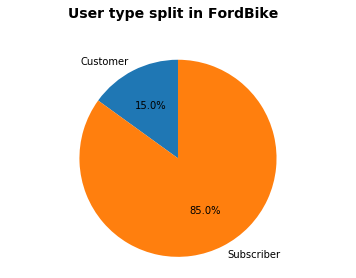

In [7]:
labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.suptitle('User type split in FordBike', y = 1.03, fontsize = 14, fontweight = 'semibold');

### Weekday / Hour usage by subscription type
Subscribers are following the commuter pattern:
- monday to friday
- commute hours(7-9am and 4-6pm)

Customers are leisure riders:
- saturday+sunday 9am-5pm
- weekdays evening 4-6pm


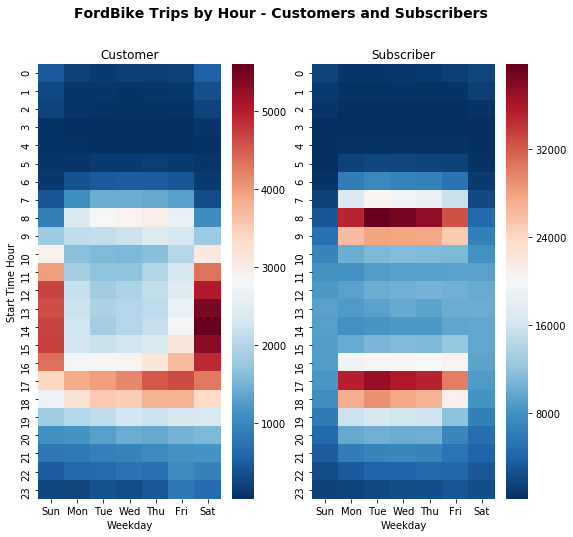

In [8]:
df['start_time_weekday'] = pd.Categorical(df['start_time_weekday'], categories=['Sun', 'Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('FordBike Trips by Hour - Customers and Subscribers', fontsize=14, fontweight='semibold')

plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="RdBu_r")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="RdBu_r")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

### Trip lenght by subscription type
Customers trips are longer comparing to the subscribers. That could be realted to the rental purpose - the commuters would go from a to b with no delays, while the same distance for thetourists may take longer - because they are enjoying the beautiful SF.


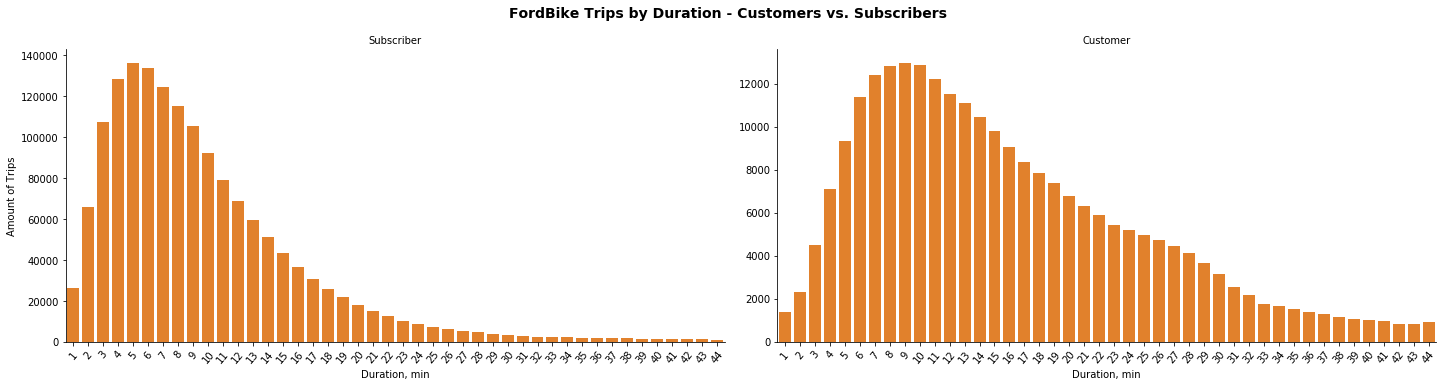

In [10]:
base_color = sns.color_palette()[1]
data = df.query('duration_min < 45')
g = sns.catplot(data = data, x = 'duration_min', col = 'user_type', kind = 'count', sharey = False, color = base_color, height = 5, aspect = 2);
g.set_axis_labels('Duration, min', 'Amount of Trips')
g.set_titles('{col_name}')
g.fig.suptitle('FordBike Trips by Duration - Customers vs. Subscribers ', y = 1.05, fontsize = 14, fontweight='semibold');
g.set_xticklabels(rotation = 50);